# Module 3: Unsupervised Learning

Welcome to the third module of this series! In this module you will first get a deeper look on what Unsupervised Learning is and in which cases it can be used. Then you will explore one of the main use cases of unsupervised learning, namely dimensionality reduction. 

**Module Overview**


3.1 [Introduction to Unsupervised Learning](#what-is-unsupervised)<br>
3.2 [Dimensionality Reduction](#dimensionality-reduction)<br>
3.3 [Conclusion](#3-conclusion)

**Dataset**

In this module we will work with the already preprocessed Swiss Food Composition dataset from **Module 1: Introduction to Machine Learning and Data Preprocessing for Food Sciences**. You can find the preprocessed dataset in the `data/swiss_food_composition_proc.csv`. 

As a quick recap, this is the resulting dataset after:
- removing the samples and features with more than 20% of missing values,
- splitting the dataset in train and test sets,
- imputing missing values 
- standardizing the remaining data

Note that in this module, we will not need the train and test splits since in the unsupervised 
learning case we do not make use of any labels or target variables and thus, we do not predict any category or value.

<a id='what-is-unsupervised'></a>
## 1. Introduction to Unsupervised Learning

Unsupervised machine learning is a type of machine learning that uses algorithms to analyze and cluster unlabelled datasets, thus the data that we have **does not have any values or categories that we can learn** and later predict, or we can simply decide to ignore the labels. Here, the models will try to find a structure in the data, or learn patterns present. Some use cases of such models would be: clustering, dimensionality reduction, data generation, anomaly detection, etc. 

In the case of [dimensionality reduction](#dim-red), we move from data with many features, to compressed data, with very few features. In the case of [clustering](https://scikit-learn.org/stable/modules/clustering.html), we try to find groups within the data, so that we can group similar samples together. While as the name suggests, in the case of [data generation](https://towardsdatascience.com/5-best-python-synthetic-data-generators-and-how-to-use-them-when-you-lack-data-f62bcf62d43c), we use the unlabelled data to learn a structure or underlying properties and based on this, the model will generate similar samples. For [anomaly detection](https://towardsdatascience.com/5-anomaly-detection-algorithms-every-data-scientist-should-know-b36c3605ea16), we can use machine learning models to find outliers in the data. Outliers are points that do not resemble the majority of the points in the dataset. 

[Fig. 1](#unsup_learn) illustrates the machine learning pipeline in case of unsupervised learning. Still there is an output from the models and it outputs what the model has learned from the data. In the case of clustering, it will output a cluster number that will show with which other samples a specific sample is most similar to. In the case of dimensionality reduction, the output will be the sample but with less features. 

Something to notice is the missing train-test split step. The purpose of the train-test split in supervised learning is to assess how well the model generalises to new, unseen data by evaluating its performance on a separate test set. Since unsupervised learning doesn't involve prediction or evaluation against target variables, the concept of a train-test split is not as applicable. However, there are specific cases where an unsupervised method can be indirectly evaluated. For example, in the case of dimensionality reduction, we can compare its impact on supervised learning tasks by comparing the performance of supervised learning models on the original and reduced datasets.

<center>
    <a id="unsup_learn"></a>
    <img src="images/part2_unsupervised/unsupervised_learning__clustering_dimred.jpg" alt="ML Unsupervised Learning" width="90%">
    <center><figcaption><em>Figure 1: Unsupervised Learning</em></figcaption></center>
</center>


💡 **CHECKPOINT:**
- How does supervised learning differ from unsupervised learning? Think of some example use cases for each.

<a id='dim-red'></a>
## 2. Dimensionality Reduction

###  2.1 Why is it used?

High-dimensional datasets are datasets that have a lot of features compared to their number of samples. **Dimensionality reduction** is used to **summarize the information content of a high-dimensional dataset** by transforming it onto a new feature space of **lower dimensionality**. The dimensionality reduction algorithms identify the most important features that affect model performance, and transform the data in a way that would preserve most of the information. Besides that, they offer a lot of advantages especially when it comes to making results easier to visualize and explain to audiences, removing noise from the dataset, and making model training faster.

The more features a datasets has, the more samples are needed so that the ML models can learn it. This is otherwise considered as **the curse of dimensionality**. Dimensionality reduction also enhances the performance of the ML models because it reduces the effects of the curse of dimensionality.  Therefore, one of the main goals of dimensionality reduction is to **reduce the number of features of the dataset while maintaining the most important information**.

All dimensionality reduction techniques are part of the unsupervised learning group of 
algorithms. Some of these techniques include: principal component analysis (PCA), t-SNE (t-distributed stochastic embedding) and UMAP (uniform manifold approximation and projection). Below we will explore **PCA**, **t-SNE** and **UMAP** in the *processed Swiss Food Composition Dataset*. However, first, we will import the necessary libraries and read the dataset.

In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import  UMAP
import pandas as pd
# we need seaborn for visualizing the results
import seaborn as sns
import ipywidgets as widgets

c:\Users\dorie\anaconda3\envs\ml4food\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\dorie\anaconda3\envs\ml4food\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\dorie\anaconda3\envs\ml4food\lib\site-packages\umap\distances.py:1086: NumbaD

In [2]:
# we will work with the preprocessed dataset
dataset = pd.read_csv('data/swiss_food_composition_proc.csv', index_col='ID')
# save the numerical columns in the cols variable
numerical_cols = dataset.select_dtypes(include='number').columns
dataset.head()

,name,category,energy_kcal,fat_g,fatty_acids_sat_g,fatty_acids_monounsat_g,fatty_acids_polyunsat_g,cholesterol_mg,carbohydrates_g,sugars_g,...,potassium_mg,sodium_mg,chloride_mg,calcium_mg,magnesium_mg,phosphorus_mg,iron_mg,iodide_µg,zinc_mg,split
ID,,,,,,,,,,,,,,,,,,,,,
2,Almond,fruits,2.470273,2.546513,0.008358,4.503052,1.488234,-0.543661,-0.392568,-0.016448,...,1.555082,-0.160855,-0.146465,1.244480,3.641656,2.293353,0.606897,-0.090492,1.240570,train
3,"Almond, dry roasted, salted",nuts,2.547143,2.571048,0.008358,4.778862,1.741154,-0.543661,-0.286820,-0.133392,...,1.456779,-0.083837,0.109730,1.244480,4.347472,2.040729,0.741814,-0.080053,1.240570,test
4,"Almond, roasted, salted",nuts,2.618100,2.736659,0.022312,5.054672,1.820191,-0.543661,-0.420154,-0.154029,...,1.325709,-0.050189,0.109730,1.052747,4.171018,2.040729,0.606897,-0.080053,1.114033,test
5,"Amaranth, seed, cooked (without addition of fa...",cereals,-0.515837,-0.520365,-0.507942,-0.510205,-0.187356,-0.543661,0.080999,-0.436070,...,-0.378208,-0.160586,-0.147356,-0.110431,0.888977,0.209208,0.505708,-0.087645,-0.088073,train
6,"Amaranth, seed, raw",cereals,1.003827,-0.219811,-0.354448,-0.315515,0.128793,-0.543661,1.860321,-0.353522,...,0.703124,-0.159880,-0.130871,0.541460,3.818110,2.609132,2.529475,-0.079579,1.493645,train


Here we define a function that will visualize the data after applying the dimensionality reduction techniques. Note that we select only the first two dimensions of the reduced dataset (which are all the features the dataset will have after applying dimensionality reduction). 

In [3]:
def visualize_data(data:pd.DataFrame, title:str, hue_value:str):
    sns.set(
    rc={'figure.figsize':(7, 5), 
        'font.family': ['DejaVu Sans']}, 
    style='white'
    )
    with sns.plotting_context("notebook", font_scale=1.3):
        ax = sns.scatterplot(
        data=data,
        x=data.columns[0], y=data.columns[1],
        alpha=1, hue= hue_value,
        palette='tab10'
    )
    ax.set(title=title)
    sns.move_legend(ax, "center left", bbox_to_anchor=(1, 0.5))

### 2.2 PCA

**Principal Component Analysis** is a **linear dimensionality reduction technique**. It projects the data points to the directions of the highest variance, since they contain the most important information in the dataset. The data is projected into a new subspace with less features than before. **The new axis of the data are orthogonal to each other and are the directions of the maximum variance in the dataset.**

[Fig. 2](#pca) gives an illustration of PCA:
<center>
    <a id="pca"></a>
    <img src="images/part2_unsupervised/PCA.jpg" alt="PCA" width="90%">
    <center><figcaption><em>Figure 2: PCA components</em></figcaption></center>
</center>

The left-hand side of the figure shows the original data in two dimensions. We find the directions of the highest variance and then project the data according to the subspace defined by these directions.
The red axes in the middle figure depict the directions of the highest variance. The data points will be projected into these two directions, which is shown in the right-hand side of the figure. In this case there is no dimensionality reduction. The projected data points have two dimensions again, even after PCA, but they reside in a new subspace, defined by the directions of the highest variance. 

**NOTE**: In this figure, there is no dimensionality reduction, as both the original and the reduced datasets have two dimensions. Also, the reduced datasets do not necessarily always have 2 components. The number of components is a hyperparameter (you can refer to module 2 for the distinction between parameters and hyperparameters) set by the data analyst. Here we always choose 2 components to visualise the results and make the procedure more intuitive.

Another important concept related to dimensionality reduction is that of **variance explained**. In dimensionality reduction, variance explained stands for the amount of information retained when the original high-dimensional data is projected into a lower-dimensional space. In case of PCA, it orders the components in increasing order of the amount of variance they explain. The first principal component explains the largest amount of variance in the data, the second component explains the second-largest amount of variance, and so on. By summing up the amounts of variance of the first *n* principal components we choose to project the data, we can quantify how much information is retained by reducing the dataset to *n* dimensions using PCA. Usually, the explained variance is reported as a percentage. For example, if the first three principal components of a dataset explain 60% of the total variance, it means that those three components capture 60% of the information present in the original data.

**PCA is sensitive to data scaling.** If variables in the dataset have different units of measurement, this can lead to biased results and inaccurate interpretations of the principal components. Therefore, it is important that the features are scaled before inputted to the PCA algorithm, if the features of the data are measured on different scales. Our dataset is already standardized from the first tutorial. So we are ready to apply PCA and visualize the results.

In [4]:
pca = PCA(n_components=2) # define the PCA object

# perform the PCA transformation and save the results in a dataframe
pca_components = pd.DataFrame(
    pca.fit_transform(dataset[numerical_cols]), # apply PCA here 
    columns=['dim_1', 'dim_2'], # define the new column names
    index=dataset.index
)

First, we define a PCA object that will perform the transformation. We specify the number of reduced dimensions, which in our case will be 2 (`n_components=2`). Then we apply the PCA transformation to the numerical part of our dataset by using the `fit_transform()` method of the `pca` object (`pca.fit_transform(dataset[numerical_cols])`). Note that this method takes the original dataset and reduces the 38 numerical features to 2 only. We save the new features in a dataframe. This dataframe will contain two columns `dim_1` and `dim_2`, one for each of the dimensions after PCA (`columns=['dim_1', 'dim_2']`). Finally, in order for the reduced dataset to have the same index as the original  dataset, we set the index to the dataset index (`index=dataset.index`).

In [5]:
# recreate the dataset but with the pca_components
data_after_pca = pd.concat([pca_components, dataset['category']], axis=1)
data_after_pca.columns = ['dim_1', 'dim_2', 'category'] # rename the columns
data_after_pca.head() # print the first 5 samples after PCA

,dim_1,dim_2,category
ID,,,
2,6.549825,6.456949,fruits
3,6.923943,6.193908,nuts
4,6.486742,6.898402,nuts
5,-0.924372,-0.584689,cereals
6,3.946850,0.080228,cereals


To create the reduced dataset, we concatenate the `pca_components` with the *category* column of the dataset and form a new dataframe. The concatenation is horizontal (`axis=1`), meaning that the *category* is appended to  the right of the `pca_components` as a new column. We define the new columns of the dataframe to be `dim_1`, `dim_2` and `category`. You can see the first 5 samples as the output of the `head()` column. As you can see, the dataset now contains two numerical  features and the category.

After this, we can visualize the data by using our method defined in the previous section:

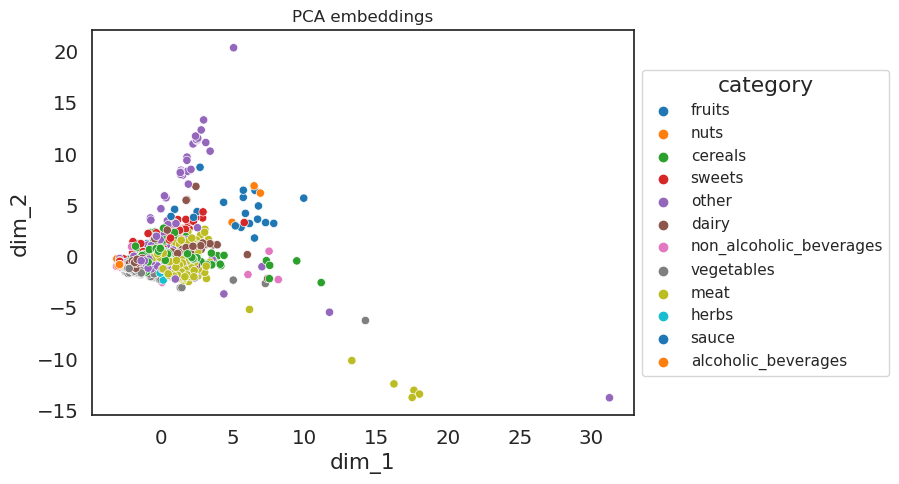

In [6]:
visualize_data(data_after_pca, 'PCA embeddings', hue_value='category')

Here we can see where different food categories reside in the 2D space after applying PCA.

You can find more information regarding PCA in [Chapter 5 of Machine Learning with Pytorch and Scikit-Learn](https://learning.oreilly.com/library/view/machine-learning-with/9781801819312/Text/Chapter_5.xhtml#_idParaDest-94) book.

💡 **CHECKPOINT:**
- Why do you think the samples from different categories are clustered together (categories are not well separated) after PCA?

### 2.3 tSNE

**t-distributed Stochastic Neighbor Embedding (t-SNE)** is a **non-linear** dimensionality reduction technique. It is mainly used for visualizing high-dimensional datasets in low dimensions. tSNE is useful in datasets where groups/clusters are not linearly separable. Usually, in these circumstances, linear dimensionality reduction techniques like PCA do not work well.
tSNE projects data points into the low dimensional space by trying to preserve the distances they have in the high-dimensional space. Also, tSNE requires the whole dataset to project it to the low-dimensional space and cannot be applied to new data points directly, without recalculating the models. You can consult [the original paper](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) for more information regarding how tSNE works. Alternatively, you can read [this blog post](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a) for a more intuitive explanation.

Now we will proceed with the implementation of tSNE. We will use the sklearn implementation of tSNE to reduce the original dataset to 2 dimensions for visualizing it, just like we did with PCA in the previous section.

In order to  make tSNE interactive, we define a function (`run_tsne`) that receives the **perplexity** as argument and uses tSNE to reduce the dataset to 2 dimensions. Perplexity is one of the hyperparameters of tSNE that controls the preservation of  local and global structure  of the data points. It determines the number of neighboring points that the algorithm checks for each point when determining the similarity between points in high-dimensional space. The larger the value of perplexity, the more neighbours will be considered for each data point. Large perplexity values favour preservation of global structure. On the other hand, low perplexity values favour preservation of local structure. Here we provide a slider to experiment with its different values and see the effects it has in the new dataset. You can check different values of the perplexity hyperparameter ranging from 10 to 100, but in practice typical values of perplexity are between 5 and 50. To learn more about the hyperparameters of tSNE you can refer to [this article](https://distill.pub/2016/misread-tsne/).

Apart from this, the code that performs the dimensionality reduction is similar to that of PCA. First we define a `tsne` object that will perform the dimensionality reduction. It will reduce the original dataset to 2 dimensions. It is initialized with the following hyperparameters:
 - `n_components` - the number of features of the reduced dataset
 - `init='pca'` to initialize the tSNE embedding, recommended in the original paper. 
 - `perplexity` - determined by the slider. 
 - `random_state=0` - to make the results deterministic
 
 After the `tsne` object is initialized, we use it to perform the dimensionality reduction. By using the `fit_transform()` method with the numerical features of the original dataset only, we get the reduced version with 2 features, named as `dim_1` and `dim_2`. We save the reduced dataset in a pandas dataframe called `tsne_components`. Then, we create a dataframe that will contain the two features of the dataset after applying tSNE and the `category` column of the original dataset. In the end, we use our method `visualize_data` to visualize the new dataset after reducing its dimensions using tSNE.

In [7]:
def run_tsne(perplexity:int):

    tsne = TSNE(n_components=2, init='pca', perplexity=perplexity, random_state=0)

    tsne_components = pd.DataFrame(
        data=tsne.fit_transform(dataset[numerical_cols]), 
        columns=['dim_1', 'dim_2'],
        index=dataset.index #this is important for the concatenation in the next command
        )
    
    data_after_tsne = pd.concat([tsne_components, dataset['category']], axis=1)
    data_after_tsne.columns = ['dim_1', 'dim_2', 'category']
    
    visualize_data(data_after_tsne, 
                   f'tSNE embeddings - perplexity={perplexity}', 
                   hue_value='category')

In [8]:
perplexity_slider = widgets.IntSlider(value=30, min=10, max=100, step=5, description='Perplexity:')
widgets.interact_manual(run_tsne, perplexity=perplexity_slider);

interactive(children=(IntSlider(value=30, description='Perplexity:', min=10, step=5), Button(description='Run …

💡 **CHECKPOINT:**
- Experiment with different values of perplexity. What do you notice? How do different values of perplexity affect the grouping of different categories? For which values of perplexity the samples of each of the categories cluster together?

### 2.4 UMAP

**Uniform Manifold Approximation and Projection (UMAP)** is another dimensionality reduction technique that we will explore. Just like tSNE, it is **non-linear**, however, unlike tSNE it tries to preserve both **the global structure of the dataset** and **the inter-cluster distances**. In addition, UMAP works better than tSNE with large datasets. Just like tSNE, UMAP also requires the whole dataset to project it to the low-dimensional space and cannot be applied to new data points directly, without recalculating the model. For more details on the theory of UMAP, you can read [this blog post](https://pair-code.github.io/understanding-umap/).

Now we will start with the implementation of UMAP. The code is similar to that of tSNE, however here we work with two hyperparameters: `n_neighbors` and `min_dist`. `n_neighbors` is the most important hyperparameter of UMAP. It controls how UMAP balances the local and global structures. UMAP will put more effort in preserving local structure when the `n_neighbors` is low, since the number of points considered in high dimensions for each single point will be low (only the nearest neighbors). `min_dist` on the other hand, controls the minimum distance between points in the low-dimensional space. The lowest the value, the closer are the points in the low-dimensional space. We provide to sliders, one for the `n_neighbors` with values ranging from 10 to 100 and one for the `min_dist` with values ranging from 0 to 1. Note that in order for the visualization to appear, you must click the *Run Interact* button.


To reduce the dimensions of the original dataset, we use the `run_umap` function that takes as arguments the `n_neighbors` and the `min_dist` from the sliders. It will create the `umap` object, with the following hyperparameters:
 - `n_components=2` - the number of features of the reduced dataset
 - `min_dist` and `n_neighbors` - determined by the slider values
 - `random_state=0` - a seed to make results deterministic and reproducible for the same dataset and set of hyperparameters

After the `umap` object is initialized, we use it to perform the dimensionality reduction. By using the `fit_transform()` method with the numerical features of the original dataset only, we get the reduced version with only 2 features, names as `dim_1` and `dim_2`. We save the reduced dataset in a pandas dataframe called `umap_components`. We specify the index of this dataframe to be the same as the index of the original dataframe (`index=dataset.index`), as well. Then, we concatenate the reduced dataset with the `category` column of the original dataset and save it in a new dataframe (`data_after_umap`). We use this dataframe to visualize the results by calling the `visualize_data()` function.


In [9]:
def run_umap(min_dist:float, n_neighbors:int):
    
    umap = UMAP(n_components=2, n_neighbors=n_neighbors, 
                min_dist=min_dist, random_state=0)
    
    umap_components = pd.DataFrame(
                        data=umap.fit_transform(dataset[numerical_cols]), 
                        columns=['dim_1', 'dim_2'],
                        index=dataset.index #this is important for the concatenation in the next command
                        )

    data_after_umap = pd.concat([umap_components, dataset['category']], axis=1)
    data_after_umap.columns = ['dim_1', 'dim_2', 'category']

    visualize_data(data_after_umap, 
                   f'UMAP embeddings - n_neighbors={n_neighbors} and min_dist={min_dist}', 
                   hue_value='category')

In [10]:
n_neighbors_slider = widgets.IntSlider(value=30, min=10, max=100, step=5, description='n_neighbors:')
min_dist_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.05, description='min_dist:')
widgets.interact_manual(run_umap, min_dist=min_dist_slider, n_neighbors=n_neighbors_slider);

interactive(children=(FloatSlider(value=0.5, description='min_dist:', max=1.0, step=0.05), IntSlider(value=30,…

💡 **CHECKPOINT:**
- Experiment with different values of `n_neighbors` and `min_dist`. What do you notice? How do different values of these hyperparameters affect the grouping of different categories? For which values the samples of each of the categories cluster together? 

## 3. Conclusion


<div align="center">

| | PCA | tSNE | UMAP |
| --------------- | --------------- | --------------- | --------------- |
| **objective**    | maximize variance    | preserve local structure    | preserve local and global structure    |
| **linearity**    | linear    | non-linear    | non-linear    |
| **scalability**    | fast for large datasets    | the slowest for large datasets    | slow for large datasets    |
| **most important parameters**    | `n_components`    | `n_components`, `perplexity`    | `n_components`, `n_neighbors`, `min_dist`    |
| **support for new data points**    | Yes    | Not directly    | Not directly    |

</div>

In this tutorial, we dived in the unsupervised learning part of machine learning. First, we explored what unsupervised learning is. Then, we explained what dimensionality reduction is. Afterwards, we saw 3 different dimensionality reduction techniques: PCA, tSNE and UMAP. The table above summarizes the main characteristics of each of these three dimensionality reduction techniques. 

**References:**

- "Machine Learning with Pytorch and Scikit-Learn" - Sebastian Raschka, Yuxi Liu, Vahid Mirjalili, Dmytro Dzhulgakov.
- ["Understanding UMAP"](https://pair-code.github.io/understanding-umap/) - Andy Coenen, Adam Pearce